# Data Exploration and Data cleaning

- Data Schema

The data is divided in multiple datasets for better understanding and organization. Please refer to the following data schema when working with it: 

![Data Schema](https://i.imgur.com/HRhd2Y0.png)

## import all necessary libraries

In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 10)

%matplotlib inline

## Load Data

In [2]:
try:
    from google.colab import drive

    # Mount the folder "drive" on google drive to Colab Notebook
    drive.mount('/content/drive')
    path = '/content/drive/My Drive/wids-taipei/2020-WiDS-Taipei-MLCC-Workshop/dataset/*.csv'
except ModuleNotFoundError:
    path = '../dataset/*.csv'

In [3]:
filenames = glob.glob(path)
pd_dict = {}

for filename in filenames:
    name = filename.split("/")[-1].split(".")[0]
    pd_dict[name] = pd.read_csv(os.path.join(filename))
    
for key,value in pd_dict.items():
    print(key)

olist_sellers_dataset
product_category_name_translation
olist_orders_dataset
olist_order_items_dataset
olist_customers_dataset
olist_geolocation_dataset
olist_order_payments_dataset
olist_order_reviews_dataset
olist_products_dataset


In [4]:
customers_data = pd_dict['olist_customers_dataset']
orders_data = pd_dict['olist_orders_dataset']
order_items_data = pd_dict['olist_order_items_dataset']
products_data = pd_dict['olist_products_dataset']
category_name_translation = pd_dict['product_category_name_translation']

## Start Data Exploratory

### Products Dataset

This dataset includes data about the products sold by Olist.

- product_id: unique product identifier
- product_category_name: root category of product, in Portuguese.
- product_name_lenght: number of characters extracted from the product name.
- product_description_lenght: number of characters extracted from the product description.
- product_photos_qty: number of product published photos.
- product_weight_g: product weight measured in grams.
- product_length_cm: product length measured in centimeters.
- product_height_cm: product height measured in centimeters.
- product_width_cm: product width measured in centimeters.

In [5]:
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Data Exploration

1. translate the name
2. how many different products
3. how many category
4. plot the distribution per category

In [6]:
# Convert the translations to dictionary format
translations = category_name_translation.set_index('product_category_name')['product_category_name_english'].to_dict()

# translate the product category column in the products df to English
products_data['product_category_name'] = products_data['product_category_name'].map(translations)

In [7]:
products_data

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


Total products 32951
Total categories:  72


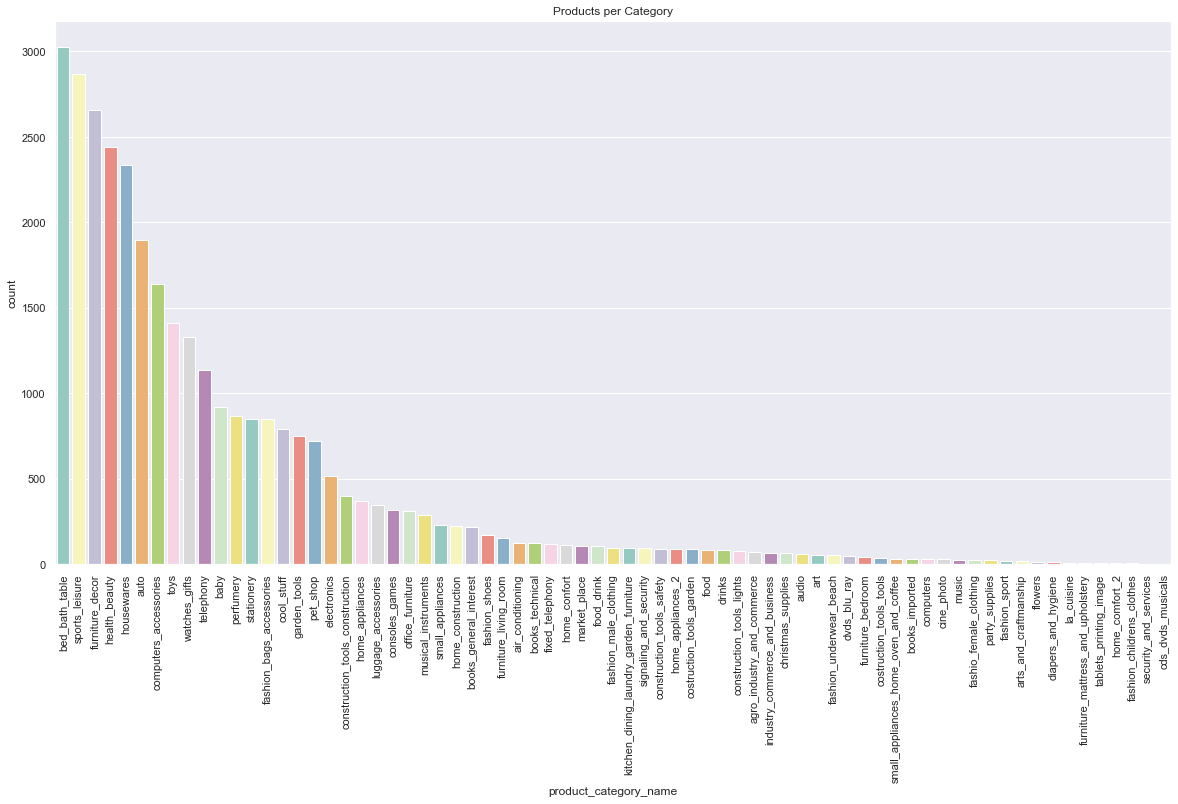

In [8]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.countplot(x='product_category_name', 
              data=products_data,
              order=products_data['product_category_name'].value_counts().sort_values(ascending=False).index,
              palette='Set3')
plt.xticks(rotation=90)
plt.title("Products per Category")

print("Total products", len(products_data['product_id']))
print("Total categories: ", len(products_data['product_category_name'].unique()))

#### Data Cleaning

In [9]:
products_data.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [10]:
products_data.isnull().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [11]:
# Missing data
products_data['product_category_name'] = products_data['product_category_name'].fillna('None')
products_data['product_photos_qty'] = products_data.loc[:, 'product_photos_qty'].fillna(products_data.loc[:, 'product_photos_qty'].mean())
products_data['product_weight_g'] = products_data.loc[:, 'product_weight_g'].fillna(products_data.loc[:, 'product_weight_g'].mean())
products_data['product_length_cm'] = products_data.loc[:, 'product_length_cm'].fillna(products_data.loc[:, 'product_length_cm'].mean())
products_data['product_height_cm'] = products_data.loc[:, 'product_height_cm'].fillna(products_data.loc[:, 'product_height_cm'].mean())
products_data['product_width_cm'] = products_data.loc[:, 'product_width_cm'].fillna(products_data.loc[:, 'product_width_cm'].mean())

In [12]:
# Outlier: weight 
products_data.loc[:, 'product_weight_g'].replace(0, products_data.loc[:, 'product_weight_g'].mean(), inplace=True)
products_data.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.188986,2276.748834,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.720614,4281.835302,16.913945,13.637140,12.078681
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [13]:
products_data.isnull().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [14]:
products_data.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.188986,2276.748834,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.720614,4281.835302,16.913945,13.637140,12.078681
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Order Items Data

This dataset includes data about the items purchased within each order.

- order_id: order unique identifier (98666 unique values)
- order_item_id: sequential number identifying number of items included in the same order.
- product_id: product unique identifier. (32951 unique values)
- seller_id: seller unique identifier.
- shipping_limit_data: Shows the seller shipping limit date for handling the order over to the logistic partner.
- price: item price
- freight_value: item freight value item (if an order has more than one item the freight value is splitted between items)

#### Example:

The order_id = `00143d0f86d6fbd9f9b38ab440ac16f5` has 3 items (same product). 
Each item has the freight calculated accordingly to its measures and weight.
To get the total freight value for each order you just have to sum.

    - The total order_item value is: 21.33 * 3 = 63.99
    - The total freight value is: 15.10 * 3 = 45.30
    - The total order value (product + freight) is: 45.30 + 63.99 = 109.29

In [15]:
order_items_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [16]:
order_items_data[order_items_data['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [17]:
# Check how many orders have more than one product
print("Total Orders: " + str(len(order_items_data['order_id'].unique())))
print("Total Orders with 2 or more items: " + str(len(order_items_data[order_items_data['order_item_id'] >= 2])))

Total Orders: 98666
Total Orders with 2 or more items: 13984


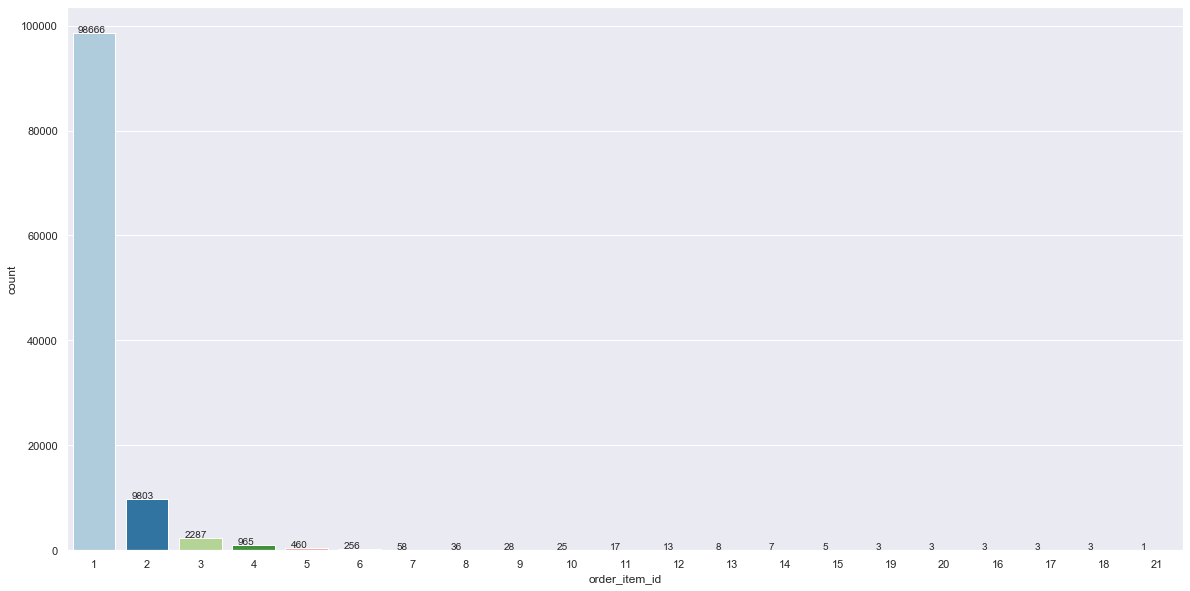

In [18]:
sns.set(rc={'figure.figsize':(20, 10)})
ax = sns.countplot(x='order_item_id', 
              data=order_items_data,
              order=order_items_data['order_item_id'].value_counts().sort_values(ascending=False).index,
              palette='Paired')

total = len(order_items_data['order_item_id'])

for p in ax.patches:
    value = p.get_height()
    x = p.get_x() + (p.get_width() / 2) - 0.3
    y = p.get_y() + p.get_height() + 100
    ax.text(x, y, value, fontsize=10)

In [19]:
order_items_data.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


##  Combining Datasets - Orders per Product

In [20]:
# Orders per Product
# Join the two datasets
order_products = pd.merge(order_items_data, products_data, on='product_id')
order_products

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,garden_tools,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,furniture_decor,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,watches_gifts,33.0,658.0,3.0,400.0,19.0,9.0,15.0
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,sports_leisure,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


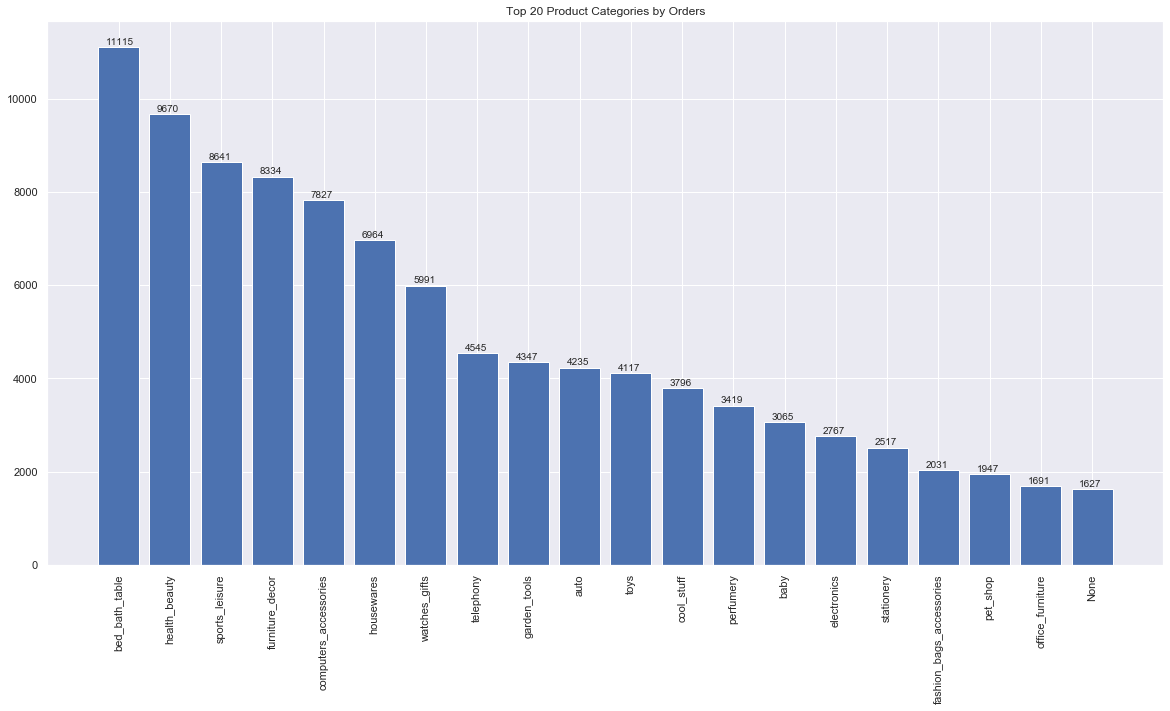

In [21]:
order_products_dict = order_products[['product_category_name','order_id']] \
    .groupby('product_category_name')['order_id'] \
    .count() \
    .sort_values(ascending=False) \
    .to_dict()

order_product_names = list(order_products_dict.keys())[:20]
order_product_values = list(order_products_dict.values())[:20]

# plot the data
f, ax1 = plt.subplots(1, 1, figsize=(20, 10), sharey=True)
f.subplots_adjust(hspace = .2, wspace=.05)

ax1.bar(order_product_names, order_product_values)
ax1.set_title('Top 20 Product Categories by Orders')
plt.xticks(rotation =90)

# labels values
for i, value in enumerate(order_product_values):
    ax1.text(i - 0.25, 
             value + 50, 
             order_product_values[i], 
             fontsize=10)